In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle


In [132]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('./diabetes.csv')

# printing the first 5 rows of the dataset
print(diabetes_dataset.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [133]:
# number of rows and columns in this dataset
print(diabetes_dataset.shape)

# getting the statistical measures of the data
print(diabetes_dataset.describe())


(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000         

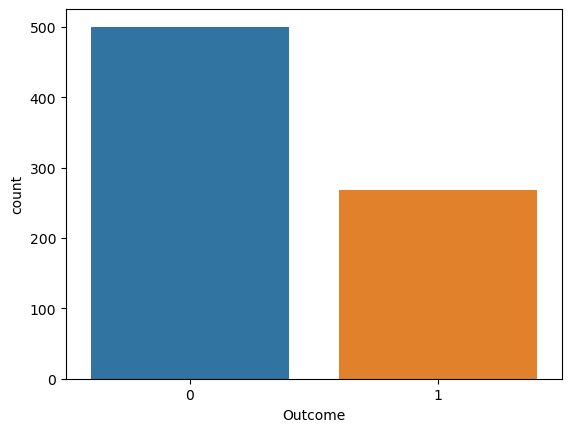

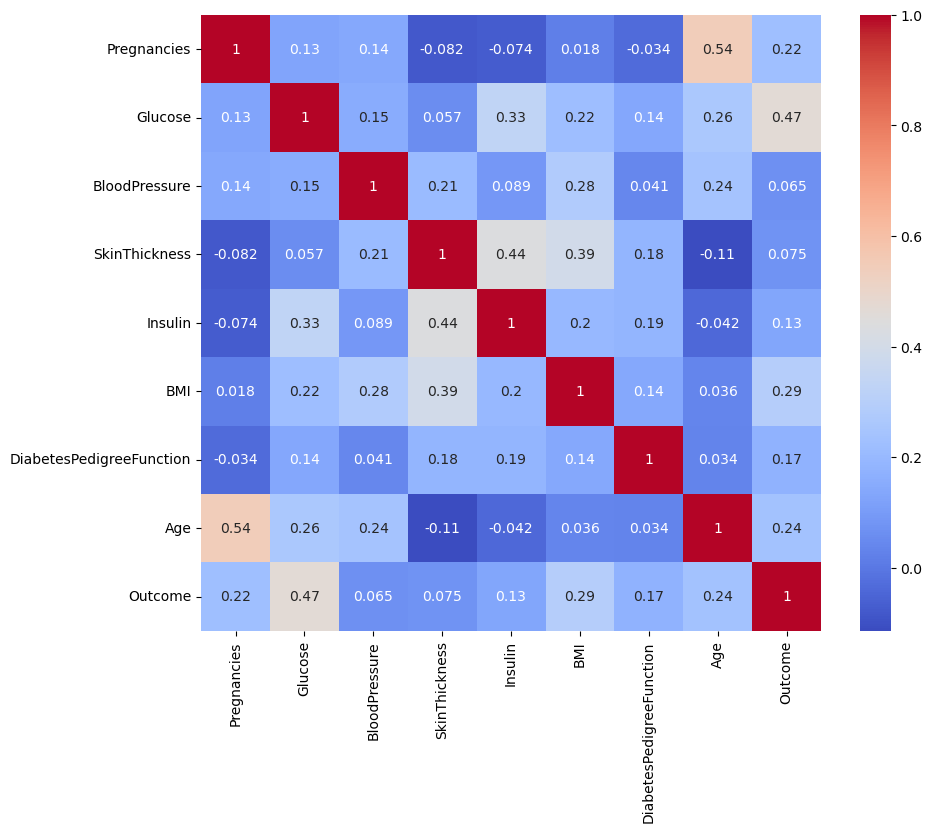

In [134]:
# Visualizing the distribution of the outcome variable
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.show()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


In [135]:
# separating the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

print(X)



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [136]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [137]:
# Data Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [138]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


In [139]:
# Model 1: SVM
classifier_svm = svm.SVC(kernel='linear', probability=True)
classifier_svm.fit(X_train, Y_train)

# Model 2: Random Forest
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, Y_train)

# Model 3: Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, Y_train)


LogisticRegression()

In [140]:
# Model Evaluation

# SVM
svm_train_prediction = classifier_svm.predict(X_train)
svm_test_prediction = classifier_svm.predict(X_test)
print('SVM Training Accuracy: ', accuracy_score(Y_train, svm_train_prediction))
print('SVM Test Accuracy: ', accuracy_score(Y_test, svm_test_prediction))
print('SVM Classification Report:\n', classification_report(Y_test, svm_test_prediction))
print('SVM Confusion Matrix:\n', confusion_matrix(Y_test, svm_test_prediction))

# Random Forest
rf_train_prediction = classifier_rf.predict(X_train)
rf_test_prediction = classifier_rf.predict(X_test)
print('RF Training Accuracy: ', accuracy_score(Y_train, rf_train_prediction))
print('RF Test Accuracy: ', accuracy_score(Y_test, rf_test_prediction))
print('RF Classification Report:\n', classification_report(Y_test, rf_test_prediction))
print('RF Confusion Matrix:\n', confusion_matrix(Y_test, rf_test_prediction))

# Logistic Regression
lr_train_prediction = classifier_lr.predict(X_train)
lr_test_prediction = classifier_lr.predict(X_test)
print('LR Training Accuracy: ', accuracy_score(Y_train, lr_train_prediction))
print('LR Test Accuracy: ', accuracy_score(Y_test, lr_test_prediction))
print('LR Classification Report:\n', classification_report(Y_test, lr_test_prediction))
print('LR Confusion Matrix:\n', confusion_matrix(Y_test, lr_test_prediction))


SVM Training Accuracy:  0.7866449511400652
SVM Test Accuracy:  0.7727272727272727
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

SVM Confusion Matrix:
 [[91  9]
 [26 28]]
RF Training Accuracy:  1.0
RF Test Accuracy:  0.7467532467532467
RF Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.69      0.50      0.58        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154

RF Confusion Matrix:
 [[88 12]
 [27 27]]
LR Training Accuracy:  0.7850162866449512
LR Test Accuracy:  

In [141]:
# Hyperparameter Tuning for SVM using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm.SVC(probability=True), param_grid, refit=True, verbose=3)
grid_search.fit(X_train, Y_train)
print('Best Parameters for SVM:', grid_search.best_params_)

# Evaluating the best SVM model
best_svm = grid_search.best_estimator_
best_svm_test_prediction = best_svm.predict(X_test)
print('Best SVM Test Accuracy: ', accuracy_score(Y_test, best_svm_test_prediction))
print('Best SVM Classification Report:\n', classification_report(Y_test, best_svm_test_prediction))
print('Best SVM Confusion Matrix:\n', confusion_matrix(Y_test, best_svm_test_prediction))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.780 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.740 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.764 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.829 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.738 total time=   0.0s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.805 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;,

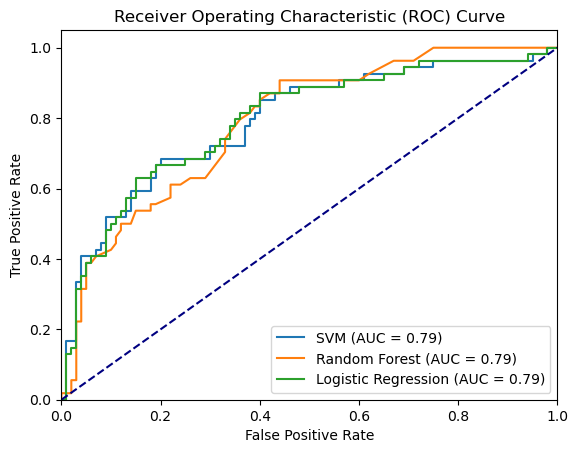

In [142]:
# ROC Curve and AUC
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure()
plot_roc_curve(Y_test, classifier_svm.predict_proba(X_test)[:, 1], 'SVM')
plot_roc_curve(Y_test, classifier_rf.predict_proba(X_test)[:, 1], 'Random Forest')
plot_roc_curve(Y_test, classifier_lr.predict_proba(X_test)[:, 1], 'Logistic Regression')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [143]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [145]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [146]:
classifier = svm.SVC(kernel='linear')

In [147]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [148]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [149]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [150]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [151]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [152]:
input_data = (2, 89, 72, 19, 0, 27.5, 0.231, 25)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/Users/hitesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [153]:
import pickle

In [154]:
filename = 'best_model_svm.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [155]:
loaded_model = pickle.load(open('best_model_svm.sav', 'rb'))

In [157]:
input_data = (1, 85, 66, 29, 0, 26.6, 0.351, 31)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/Users/hitesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
